# Empirical distributions
## Normal-like distributions


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

nls97 = pd.read_csv("../05-data_cleaning/data/nls97.csv")

In [6]:
# satmath is normal-like distributed
nls97['satmath'].describe()

count    1407.000000
mean      500.590618
std       114.953309
min         7.000000
25%       430.000000
50%       500.000000
75%       580.000000
max       800.000000
Name: satmath, dtype: float64

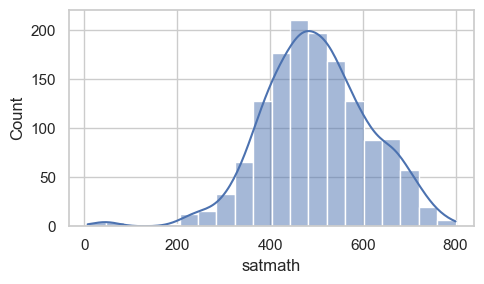

In [22]:
# Histogram is a good way to show empirical distribution

fig, ax=plt.subplots(nrows=1, ncols=1, figsize=(5,3), tight_layout=True)

sns.histplot(data=nls97['satmath'],
             kde=True, # kde stands for Kernel Density Estimation
             bins=20, ax=ax)
plt.show()

<Axes: xlabel='satmath'>

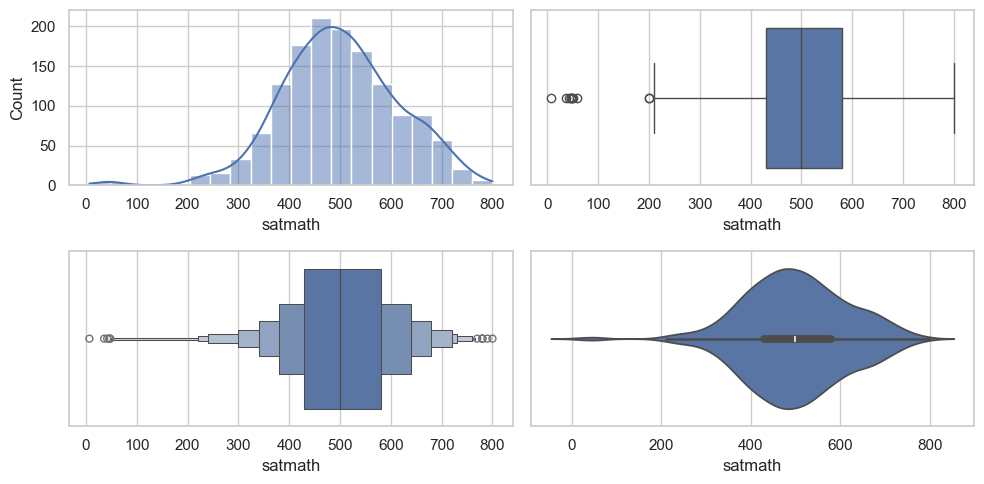

In [17]:
# We can also use box plot
sns.set_theme(style='whitegrid', font_scale=1)

fig, axes=plt.subplots(nrows=2, ncols=2, figsize=(10,5), tight_layout=True, sharex=False, sharey=False)

sns.histplot(data=nls97['satmath'], kde=True, bins=20, ax=axes.flat[0])
sns.boxplot(data=nls97['satmath'], orient='h',ax=axes.flat[1])
sns.boxenplot(data=nls97['satmath'], orient='h',ax=axes.flat[2])
sns.violinplot(data=nls97['satmath'], orient='h',ax=axes.flat[3])


## Skewed distribution
The wage in NLS97 dataset is right skewed
- mean > median (49k vs 40 k)
- Skewness = 2.44
- It has a long tail to the right

In [23]:
nls97['wageincome'].describe()

count      5091.000000
mean      49477.022196
std       40677.696798
min           0.000000
25%       25000.000000
50%       40000.000000
75%       62000.000000
max      235884.000000
Name: wageincome, dtype: float64

In [24]:
nls97['wageincome'].skew()

np.float64(2.436040651214085)

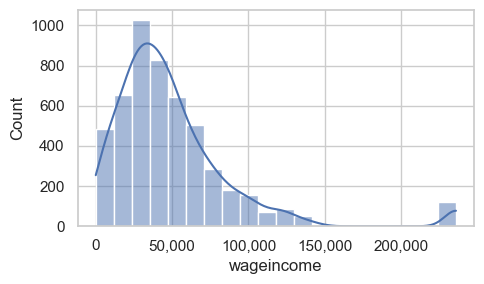

In [28]:
import matplotlib as mpl

fig, ax=plt.subplots(nrows=1, ncols=1, figsize=(5,3), tight_layout=True)

sns.histplot(data=nls97['wageincome'], kde=True,
             bins=20, ax=ax)

# to add thousand separator to the xasis
ax.get_xaxis().set_major_formatter(mpl.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

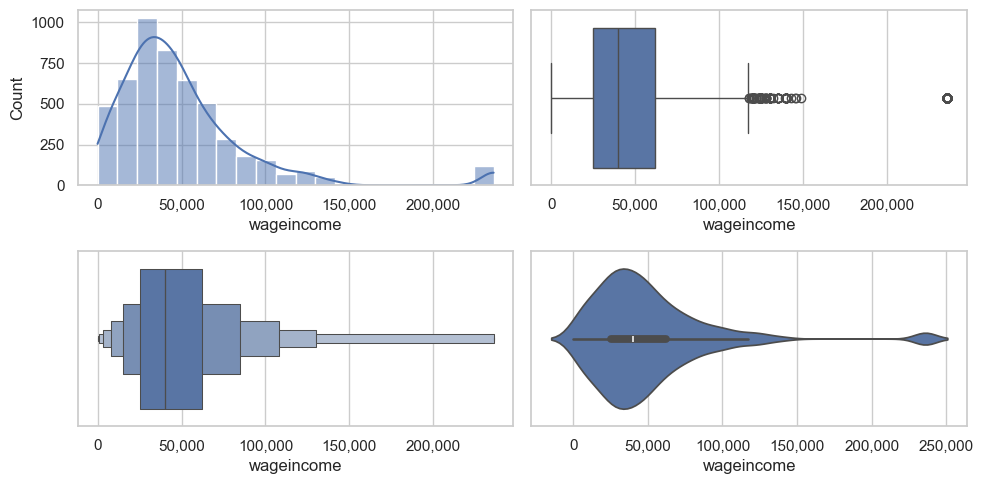

In [30]:
# let's plot four types of plots

sns.set_theme(style='whitegrid', font_scale=1)

fig, axes=plt.subplots(nrows=2, ncols=2, figsize=(10,5), tight_layout=True, sharex=False, sharey=False)

variable_to_plot = 'wageincome'

sns.histplot(data=nls97[variable_to_plot], kde=True, bins=20, ax=axes.flat[0])
sns.boxplot(data=nls97[variable_to_plot], orient='h',ax=axes.flat[1])
sns.boxenplot(data=nls97[variable_to_plot], orient='h',ax=axes.flat[2])
sns.violinplot(data=nls97[variable_to_plot], orient='h',ax=axes.flat[3])

for ax in axes.flat:
    ax.get_xaxis().set_major_formatter(mpl.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

Log transformation might help normalized right-skewed distributions, or it might transform it to left-skewed distributions

<Axes: xlabel='log_transformed_income', ylabel='Count'>

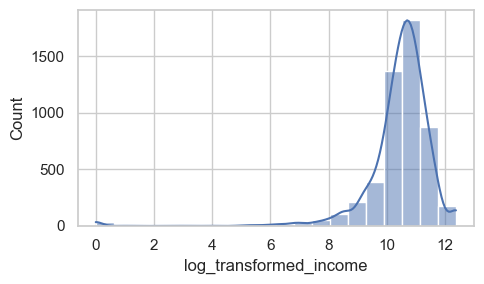

In [35]:
log_transformed_income = pd.Series(data=np.log1p(nls97['wageincome']),
                                   name='log_transformed_income')

fig, ax=plt.subplots(nrows=1, ncols=1, figsize=(5,3), tight_layout=True)

sns.histplot(data=log_transformed_income, kde=True,
             bins=20, ax=ax)

In [36]:
log_transformed_income.skew()

np.float64(-4.29257318643819)

## Count (Poisson-like) distributions
Example: we use the count of 911 calls in each neighborhood in Phoenix, AZ from 2015 to 2025.

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

# first, let's read the data
phx_911 = pd.read_csv('/Users/jieswang/PycharmProjects/2023-Heat_reselience_AZ_Gov/data/311/calls-for-service_calls-for-service_callsforservice.csv', parse_dates=['CALL_RECEIVED']).drop_duplicates(subset='INCIDENT_NUM')

In [66]:
# then, compute the number of 911 calls from each neighborhood (aka, "GRID")

phx_neighborhood_911 = phx_911.groupby(by="GRID", as_index=False)['INCIDENT_NUM'].count().rename(columns={'INCIDENT_NUM':'call_count'})

phx_neighborhood_911

,GRID,call_count
0,AB10,1455
1,AB11,3241
2,AB12,2045
3,AB14,120
4,AB15,1892
...,...,...
1882,JE36,20
1883,JE37,359
1884,JE38,816
1885,JE39,13


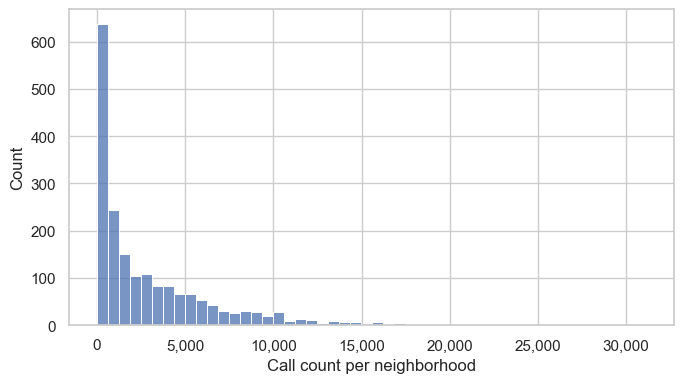

In [74]:
import matplotlib as mpl

fig, ax=plt.subplots(nrows=1, ncols=1, figsize=(7,4), tight_layout=True)

sns.histplot(data=phx_neighborhood_911['call_count'].rename("Call count per neighborhood"), kde=False,
             bins=50, ax=ax)

# to add thousand separator to the xasis
ax.get_xaxis().set_major_formatter(mpl.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

<Axes: xlabel='Call count per neighborhood (log)', ylabel='Count'>

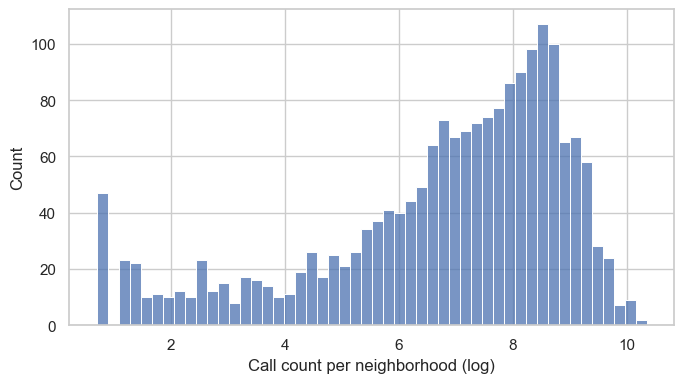

In [73]:
# log transformation

fig, ax=plt.subplots(nrows=1, ncols=1, figsize=(7,4), tight_layout=True)

sns.histplot(data=np.log1p(phx_neighborhood_911['call_count']).rename("Call count per neighborhood (log)"), kde=False,
             bins=50, ax=ax)

## Power law distribution
example: we use a real world data I collected and prepared about patents. The dataset contains the number of patents (overall and patents with women inventors) filed by each county in the U.S. between 1976 and 2021.

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

county_patents = pd.read_csv("./data/county_patent_gender_20260112.csv")


In [76]:
county_patents['patent_count'].describe()

count      3526.000000
mean        856.988088
std        7445.940288
min           1.000000
25%           3.000000
50%          15.000000
75%          87.000000
max      322220.000000
Name: patent_count, dtype: float64

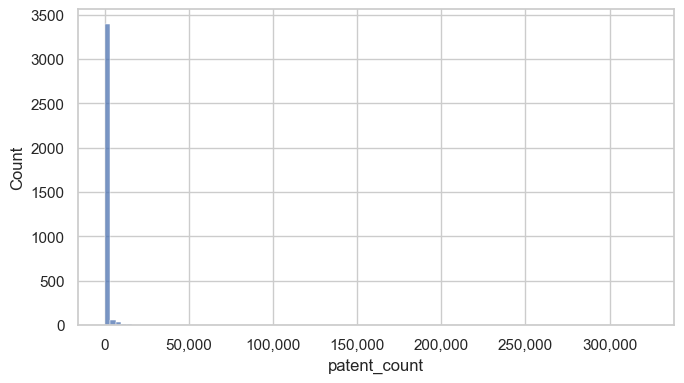

In [45]:
import matplotlib as mpl

fig, ax=plt.subplots(nrows=1, ncols=1, figsize=(7,4), tight_layout=True)

sns.histplot(data=county_patents['patent_count'], kde=False,
             bins=100, ax=ax)

# to add thousand separator to the xasis
ax.get_xaxis().set_major_formatter(mpl.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

As you can see, the data is super right-skewed. We can set a `binrange` to plot a subset of the data

<Axes: xlabel='patent_count', ylabel='Count'>

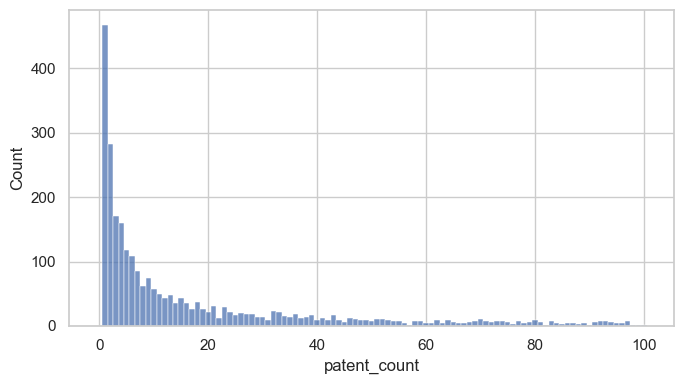

In [77]:
fig, ax=plt.subplots(nrows=1, ncols=1, figsize=(7,4), tight_layout=True)

sns.histplot(data=county_patents['patent_count'], kde=False,
             # bins=20,
             binrange=(0, 100),
             discrete=True, # if discrete=True, then each number shows as a bin
             ax=ax)

<Axes: xlabel='patent_count', ylabel='Count'>

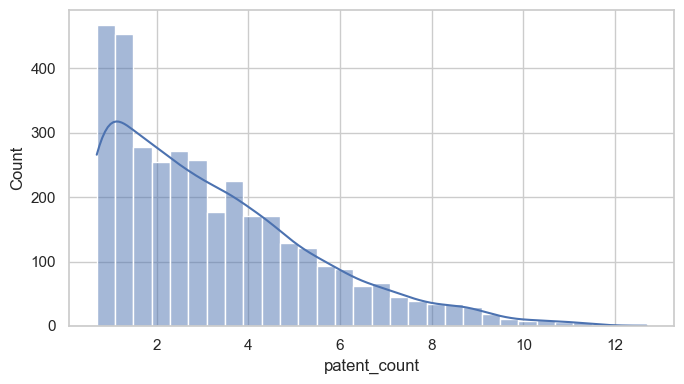

In [81]:
# Observe how log transformation would change the histogram plot

fig, ax=plt.subplots(nrows=1, ncols=1, figsize=(7,4), tight_layout=True)

sns.histplot(data=np.log1p(county_patents['patent_count']), kde=True,
             bins=30,
             ax=ax)

<Axes: xlabel='patent_count', ylabel='Count'>

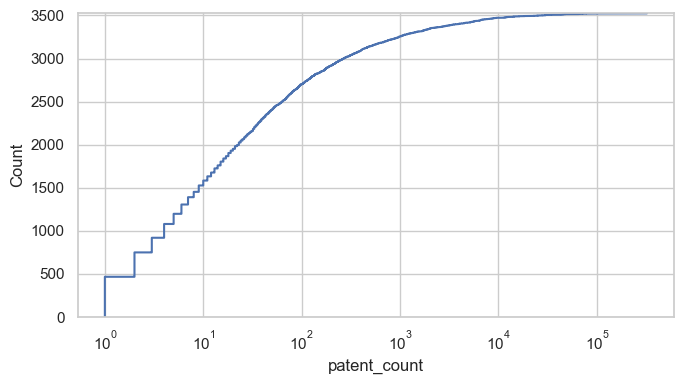

In [89]:
fig, ax=plt.subplots(nrows=1, ncols=1, figsize=(7,4), tight_layout=True)

sns.ecdfplot(data=county_patents['patent_count'],
             log_scale=(True, False),
             stat="count",
             ax=ax)


_80:20 rule (Pareto principle):_

Let's inspect the "vital few" in U.S. counties' patent productivity.

In [111]:

for i in [50, 60, 70, 80, 90, 95, 99]:
    print(f"The top {100-i}% counties produced more than {(cut_off:=(county_patents['patent_count'].quantile(i/100))):.0f} patents each, and {(total_:=(county_patents[county_patents['patent_count']>=cut_off]['patent_count'].sum())):,} ({total_/county_patents['patent_count'].sum():.1%}) total.")

The top 50% counties produced more than 15 patents each, and 3,013,811 (99.7%) total.
The top 40% counties produced more than 28 patents each, and 3,006,904 (99.5%) total.
The top 30% counties produced more than 58 patents each, and 2,992,590 (99.0%) total.
The top 20% counties produced more than 139 patents each, and 2,960,481 (98.0%) total.
The top 10% counties produced more than 594 patents each, and 2,855,900 (94.5%) total.
The top 5% counties produced more than 2018 patents each, and 2,656,427 (87.9%) total.
The top 1% counties produced more than 16023 patents each, and 1,844,682 (61.0%) total.
